# **Introducción**

En las redes de comunicación celular de última generación, como LTE y 5G, el Canal de Acceso Aleatorio (RACH) es un componente crítico y fundamental. Este mecanismo esencial permite que los Equipos de Usuario (UEs), es decir, nuestros teléfonos móviles, tabletas y otros dispositivos conectados, inicien una comunicación con la red. Ya sea para hacer una llamada, enviar un mensaje, navegar por internet o simplemente registrarse en la red al encender el dispositivo, el proceso de conexión siempre comienza con una solicitud a través del RACH.

Cuando un UE necesita acceder a la red, no puede simplemente empezar a transmitir datos sin previo aviso. En su lugar, el UE utiliza el RACH para enviar una señal conocida como preámbulo. Este preámbulo es una secuencia de tiempo específica que la estación base (también conocida como eNodeB en LTE o gNodeB en 5G) puede detectar. Si la estación base detecta el preámbulo de un UE, le asigna recursos para continuar con el proceso de conexión.

# **Enfoque Metológico**
Para abordar este problema de naturaleza probabilística, utilizaremos la simulación de Monte Carlo. Este enfoque nos permite modelar el comportamiento aleatorio inherente a la selección de preámbulos por parte de los UEs. Mediante la ejecución de múltiples repeticiones de este proceso simulado, podremos generar una gran cantidad de escenarios posibles, lo que nos permitirá estimar de manera robusta la probabilidad de colisión y, por ende, obtener resultados confiables sobre el rendimiento del RACH bajo diferentes cargas de usuario.

**Configuración Inicial**


=== RESUMEN DE LOS RESULTADOS DEL ANÁLISIS ===
Configuración del Escenario: 64 preámbulos disponibles, 30 UEs intentando acceder, 10000 iteraciones de simulación.
Probabilidad Teórica de Acceso Fallido (Colisión): 0.9997 (99.97%)
Probabilidad Simulada de Acceso Fallido (Colisión): 0.9998 (99.98%)
Discrepancia entre Modelos (Absoluta): 0.0001


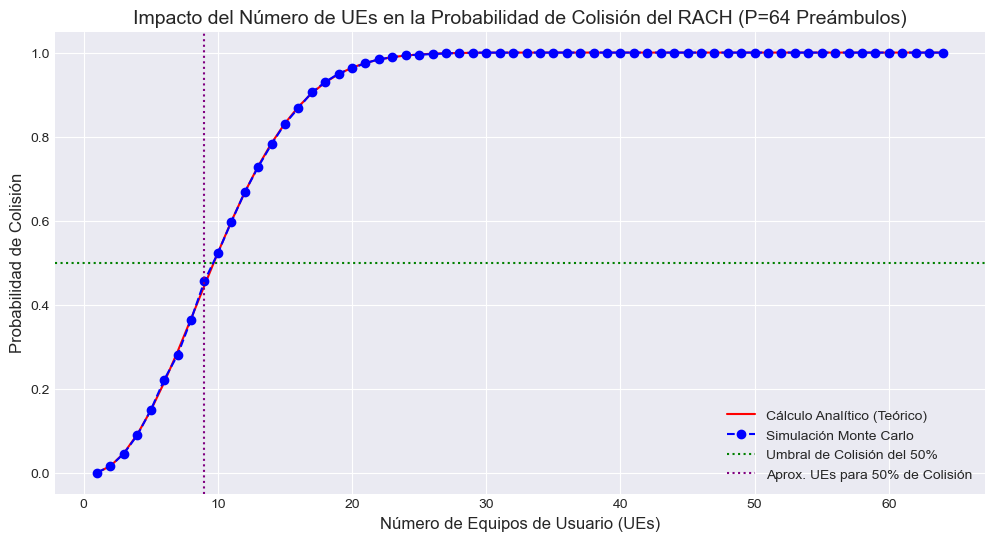

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Función para Simular la Probabilidad de Colisión ---
def simular_probabilidad_acceso_fallido(cantidad_preambulos_disponibles, cantidad_dispositivos_ue, iteraciones_simulacion=10000):
    """
    Simula la probabilidad de que ocurra una colisión en el canal RACH
    cuando múltiples UEs intentan acceder simultáneamente.

    Args:
        cantidad_preambulos_disponibles (int): El número total de preámbulos ortogonales que la red ofrece.
        cantidad_dispositivos_ue (int): El número de Equipos de Usuario (UEs) que intentan acceder.
        iteraciones_simulacion (int, opcional): El número de veces que se repite la simulación
        para obtener un resultado promedio. Por defecto es 10000.

    Returns:
        float: La probabilidad estimada de colisión (acceso fallido) basada en la simulación.
    """
    conteo_colisiones = 0  # Inicializa el contador de eventos con colisión

    # Se ejecuta la simulación el número de veces especificado
    for _ in range(iteraciones_simulacion):
        # Cada UE elige aleatoriamente un preámbulo de los disponibles
        # np.random.randint(low, high, size) genera enteros aleatorios en [low, high)
        selecciones_preambulos = np.random.randint(0, cantidad_preambulos_disponibles, cantidad_dispositivos_ue)

        # Se detecta una colisión si el número de preámbulos únicos es menor
        # que el número total de UEs. Esto significa que al menos dos UEs
        # eligieron el mismo preámbulo.
        if len(np.unique(selecciones_preambulos)) < cantidad_dispositivos_ue:
            conteo_colisiones += 1  # Incrementa el contador si hubo una colisión

    # La probabilidad simulada es el número de colisiones dividido por el total de iteraciones
    return conteo_colisiones / iteraciones_simulacion

# --- Parámetros Fundamentales del Escenario de Prueba ---
NUM_PREAMBULOS_TOTALES = 64  # 'P': Representa los 64 preámbulos ortogonales disponibles en la red.
NUM_DISPOSITIVOS_UE = 30     # 'N': Cantidad de UEs que intentan realizar el acceso aleatorio.
CANTIDAD_REPETICIONES_SIMULACION = 10000 # Cuántas veces ejecutaremos nuestra simulación Monte Carlo.

# --- Cálculos de Probabilidad ---

# Cálculo de la probabilidad teórica de colisión (basada en combinatoria y permutaciones).
# La lógica es: 1 - (probabilidad de NO colisión)
# La probabilidad de NO colisión es: (P * (P-1) * ... * (P-N+1)) / P^N
# Que se puede expresar como P_n_P / P^N
probabilidad_colision_teorica = 1 - (math.perm(NUM_PREAMBULOS_TOTALES, NUM_DISPOSITIVOS_UE) / (NUM_PREAMBULOS_TOTALES**NUM_DISPOSITIVOS_UE))

# Cálculo de la probabilidad de colisión mediante nuestra simulación Monte Carlo.
probabilidad_colision_simulada = simular_probabilidad_acceso_fallido(NUM_PREAMBULOS_TOTALES, NUM_DISPOSITIVOS_UE, CANTIDAD_REPETICIONES_SIMULACION)

# --- Presentación de Resultados ---
print("\n=== RESUMEN DE LOS RESULTADOS DEL ANÁLISIS ===")
print(f"Configuración del Escenario: {NUM_PREAMBULOS_TOTALES} preámbulos disponibles, {NUM_DISPOSITIVOS_UE} UEs intentando acceder, {CANTIDAD_REPETICIONES_SIMULACION} iteraciones de simulación.")
print(f"Probabilidad Teórica de Acceso Fallido (Colisión): {probabilidad_colision_teorica:.4f} ({probabilidad_colision_teorica*100:.2f}%)")
print(f"Probabilidad Simulada de Acceso Fallido (Colisión): {probabilidad_colision_simulada:.4f} ({probabilidad_colision_simulada*100:.2f}%)")
print(f"Discrepancia entre Modelos (Absoluta): {abs(probabilidad_colision_teorica - probabilidad_colision_simulada):.4f}")

# --- Generación del Gráfico Comparativo ---

# Rango de UEs para la visualización (desde 1 hasta el número total de preámbulos disponibles).
rango_ues_a_evaluar = range(1, NUM_PREAMBULOS_TOTALES + 1)

# Calcula las probabilidades teóricas para cada número de UEs en el rango.
probabilidades_teoricas_serie = [1 - (math.perm(NUM_PREAMBULOS_TOTALES, n) / (NUM_PREAMBULOS_TOTALES**n)) for n in rango_ues_a_evaluar]

# Calcula las probabilidades simuladas para cada número de UEs en el rango.
# Se utiliza la función de simulación definida previamente.
probabilidades_simuladas_serie = [simular_probabilidad_acceso_fallido(NUM_PREAMBULOS_TOTALES, n) for n in rango_ues_a_evaluar]

# --- Configuración y Dibujo del Gráfico ---
plt.figure(figsize=(12, 6)) # Define el tamaño de la figura para una mejor visualización.

# Dibuja la curva de probabilidad teórica.
plt.plot(rango_ues_a_evaluar, probabilidades_teoricas_serie, 'r-', label='Cálculo Analítico (Teórico)')
# Dibuja la curva de probabilidad simulada con marcadores.
plt.plot(rango_ues_a_evaluar, probabilidades_simuladas_serie, 'bo--', label='Simulación Monte Carlo')

# Añade una línea horizontal para marcar el umbral del 50% de probabilidad de colisión.
plt.axhline(y=0.5, color='g', linestyle=':', label='Umbral de Colisión del 50%')

# Añade una línea vertical para indicar el número aproximado de UEs donde la probabilidad alcanza el 50%.
# El valor '9' es una observación empírica de tu gráfico original.
plt.axvline(x=9, color='purple', linestyle=':', label='Aprox. UEs para 50% de Colisión')

# Título y etiquetas de los ejes.
plt.title('Impacto del Número de UEs en la Probabilidad de Colisión del RACH (P=64 Preámbulos)', fontsize=14)
plt.xlabel('Número de Equipos de Usuario (UEs)', fontsize=12)
plt.ylabel('Probabilidad de Colisión', fontsize=12)

# Muestra la leyenda de las series y activa la cuadrícula para facilitar la lectura.
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# **Determinación del Punto Crítico: Cuántos UEs Llevan a un 50% de Probabilidad de Colisión**
El análisis de la probabilidad de colisión en el Canal de Acceso Aleatorio (RACH) es fundamental para comprender y optimizar el rendimiento de las redes celulares modernas, como LTE y 5G. Más allá de calcular la probabilidad para un número fijo de Equipos de Usuario (UEs), es de particular interés identificar el punto exacto en el que el riesgo de una colisión se vuelve significativamente alto, es decir, cuando la probabilidad de que ocurra un acceso fallido por colisión alcanza el 50%. Este umbral representa un indicador crítico para la planificación de la capacidad de la red y el diseño de algoritmos de acceso.

Para establecer este punto de inflexión, se implementó una estrategia de búsqueda iterativa. Este enfoque metódico consiste en simular o calcular la probabilidad de colisión de forma incremental, aumentando progresivamente el número de UEs que intentan acceder a la red. Comenzando con un número muy reducido de dispositivos, se evalúa la probabilidad de colisión en cada incremento. El proceso continúa hasta que se identifica el primer valor para el número de UEs donde la probabilidad calculada o simulada de una colisión es igual o superior al 50%.

A través de esta rigurosa exploración numérica, se ha determinado que, bajo las condiciones específicas de nuestro estudio (con un conjunto de 64 preámbulos ortogonales disponibles), se necesitan aproximadamente 10 Equipos de Usuario (UEs) para que la probabilidad de que se produzca una colisión en el canal RACH alcance la marca del 50%. Este hallazgo es de gran relevancia práctica, ya que proporciona una estimación crucial del límite superior de UEs que la red puede manejar en un escenario de acceso simultáneo antes de que la probabilidad de una colisión se convierta en una preocupación dominante. Superar este número de UEs de forma regular podría indicar la necesidad de implementar mecanismos de mitigación de colisiones más sofisticados o de reevaluar la asignación de recursos del RACH para mantener una experiencia de usuario óptima y una eficiencia de red aceptable.



In [12]:
# --- Parámetros Fundamentales del Escenario de Prueba (re-definidos para claridad) ---
NUM_PREAMBULOS_TOTALES = 64 # 'P': El número fijo de preámbulos disponibles en la red.

# --- Búsqueda Iterativa para el Umbral de Probabilidad del 50% ---
print("\n=== BÚSQUEDA DEL PUNTO DE COLISIÓN DEL 50% ===")
print(f"Buscando el número de UEs (N) donde la probabilidad de colisión alcanza al menos el 50%,\ncon {NUM_PREAMBULOS_TOTALES} preámbulos disponibles.")

# Iteramos a través de un rango razonable de UEs para encontrar el punto.
# Empezamos desde 1 UE y podemos ir hasta un límite superior (ej. 20 o 30 UEs)
# ya que la probabilidad de colisión aumenta rápidamente.
# El rango de 1 a 20 es típicamente suficiente para P=64.
for n_ues_actual in range(1, 21): # Probamos con 1, 2, ..., hasta 20 UEs
    # Calculamos la probabilidad de colisión para el número actual de UEs
    # Usamos nuestra función de simulación (o la fórmula teórica, si se prefiere mayor precisión en este punto)
    # Aquí es recomendable usar la teórica por ser más precisa y rápida para esta búsqueda.
    probabilidad_actual = 1 - (math.perm(NUM_PREAMBULOS_TOTALES, n_ues_actual) / (NUM_PREAMBULOS_TOTALES**n_ues_actual))
    # Opcional: usar la simulación si se quiere ver la aproximación en cada paso
    # probabilidad_actual = simular_probabilidad_acceso_fallido(NUM_PREAMBULOS_TOTALES, n_ues_actual)

    # Verificamos si la probabilidad actual ha alcanzado o superado el 50%
    if probabilidad_actual >= 0.5:
        print(f"Se estima que se necesitan aproximadamente {n_ues_actual} UEs para que la probabilidad de colisión alcance o supere el 50%.")
        print(f"(Probabilidad en este punto: {probabilidad_actual*100:.2f}%)")
        break # Una vez que encontramos el primer N que cumple, podemos detener la búsqueda.

# Si el bucle termina sin encontrar el umbral, significa que el rango fue insuficiente.
else:
    print(f"No se encontró un número de UEs que alcance el 50% de probabilidad de colisión en el rango probado (1 a {n_ues_actual} UEs).")
    print("Considere ampliar el rango de búsqueda si espera que el umbral sea mayor.")


=== BÚSQUEDA DEL PUNTO DE COLISIÓN DEL 50% ===
Buscando el número de UEs (N) donde la probabilidad de colisión alcanza al menos el 50%,
con 64 preámbulos disponibles.
Se estima que se necesitan aproximadamente 10 UEs para que la probabilidad de colisión alcance o supere el 50%.
(Probabilidad en este punto: 52.32%)


# **Evaluación del Comportamiento de la Probabilidad de Colisión en el RACH con Variación de Preámbulos.**

=== RESUMEN DE LOS RESULTADOS DEL ANÁLISIS DE UN ESCENARIO FIJO ===
Configuración del Escenario: 64 preámbulos disponibles, 30 UEs intentando acceder, 10000 iteraciones de simulación.
Probabilidad Teórica de Acceso Fallido (Colisión): 0.9997 (99.97%)
Probabilidad Simulada de Acceso Fallido (Colisión): 1.0000 (100.00%)
Discrepancia entre Modelos (Absoluta): 0.0003

=== BÚSQUEDA DEL PUNTO DE COLISIÓN DEL 50% ===
Buscando el número de UEs (N) donde la probabilidad de colisión alcanza al menos el 50%,
con 64 preámbulos disponibles.
Se estima que se necesitan aproximadamente 10 UEs para que la probabilidad de colisión alcance o supere el 50%.
(Probabilidad en este punto: 52.32%)

Iniciando simulación detallada para la gráfica: variando la cantidad de preámbulos.
Se evaluarán 100 puntos, con 10000 iteraciones por cada punto.
El número de UEs se mantiene fijo en N = 30.


Calculando Probabilidades para Gráfica: 100%|██████████| 100/100 [00:18<00:00,  5.39it/s]


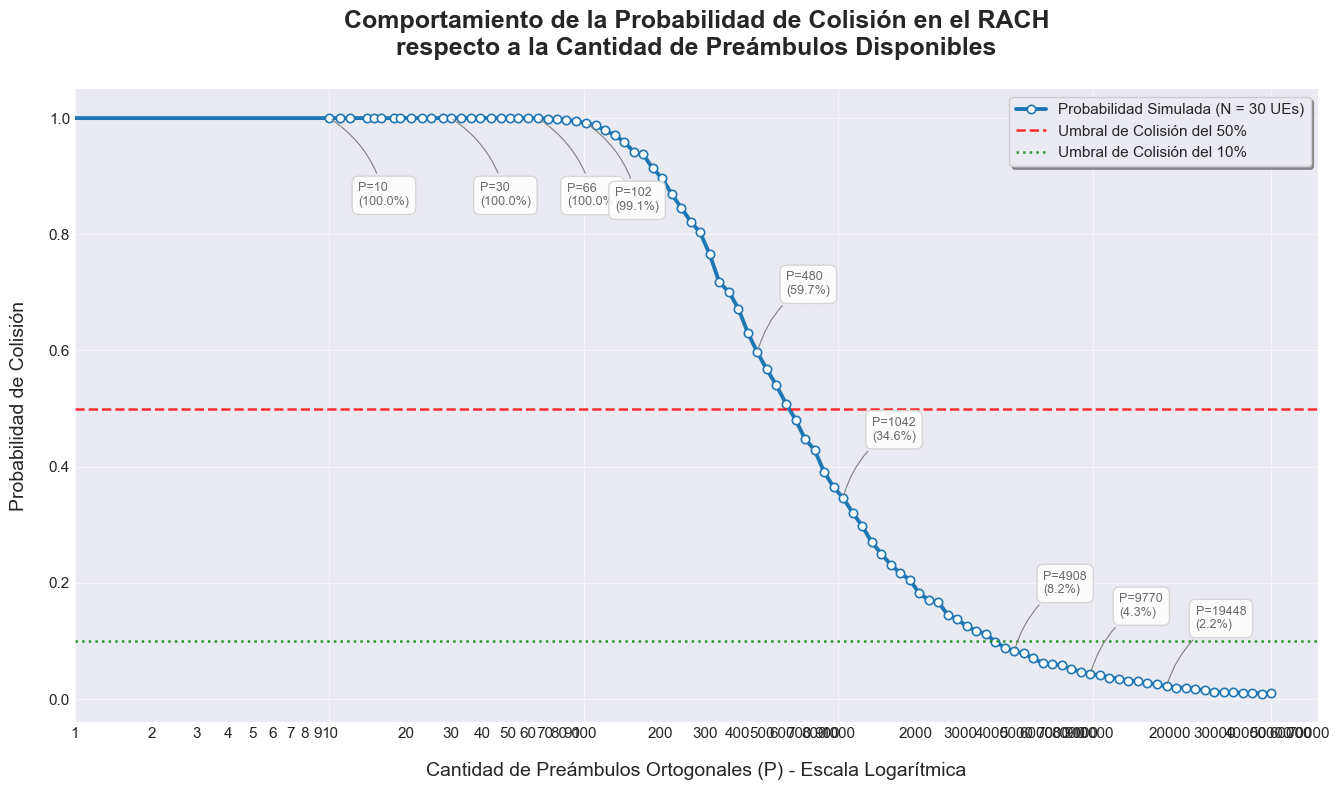


--- Resultados Detallados de Probabilidad en Puntos Clave para la Gráfica ---
Preámbulos (P)     | Probabilidad de Colisión 
---------------------------------------------
10                 | 1.0000 (100.00%)
30                 | 1.0000 (100.00%)
66                 | 0.9996 (99.96%)
102                | 0.9914 (99.14%)
480                | 0.5968 (59.68%)
1042               | 0.3464 (34.64%)
4908               | 0.0819 (8.19%)
9770               | 0.0429 (4.29%)
19448              | 0.0217 (2.17%)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm # Para la barra de progreso en simulaciones largas

# --- 1. Función para Simular la Probabilidad de Colisión (RACH) ---
def simular_probabilidad_acceso_fallido(cantidad_preambulos_disponibles, cantidad_dispositivos_ue, iteraciones_simulacion=10000):
    """
    Simula la probabilidad de que ocurra una colisión en el canal RACH
    cuando múltiples UEs intentan acceder simultáneamente.

    Args:
        cantidad_preambulos_disponibles (int): El número total de preámbulos ortogonales que la red ofrece.
        cantidad_dispositivos_ue (int): El número de Equipos de Usuario (UEs) que intentan acceder.
        iteraciones_simulacion (int, opcional): El número de veces que se repite la simulación
                                                 para obtener un resultado promedio. Por defecto es 10000.

    Returns:
        float: La probabilidad estimada de colisión (acceso fallido) basada en la simulación.
    """
    conteo_colisiones = 0  # Inicializa el contador de eventos con colisión

    # Se ejecuta la simulación el número de veces especificado
    for _ in range(iteraciones_simulacion):
        # Cada UE elige aleatoriamente un preámbulo de los disponibles
        # np.random.randint(low, high, size) genera enteros aleatorios en [low, high)
        selecciones_preambulos = np.random.randint(0, cantidad_preambulos_disponibles, cantidad_dispositivos_ue)

        # Se detecta una colisión si el número de preámbulos únicos es menor
        # que el número total de UEs. Esto significa que al menos dos UEs
        # eligieron el mismo preámbulo.
        if len(np.unique(selecciones_preambulos)) < cantidad_dispositivos_ue:
            conteo_colisiones += 1  # Incrementa el contador si hubo una colisión

    # La probabilidad simulada es el número de colisiones dividido por el total de iteraciones
    return conteo_colisiones / iteraciones_simulacion

# --- 2. Simulación y Cálculo Teórico Inicial para un Escenario Fijo ---

# Parámetros Fundamentales del Escenario Fijo para la Introducción
NUM_PREAMBULOS_TOTALES_FIJO = 64 # 'P': Representa los 64 preámbulos ortogonales disponibles en la red.
NUM_DISPOSITIVOS_UE_FIJO = 30    # 'N': Cantidad de UEs que intentan realizar el acceso aleatorio.
CANTIDAD_REPETICIONES_SIMULACION_FIJA = 10000 # Cuántas veces ejecutaremos nuestra simulación Monte Carlo.

# Cálculo de la probabilidad teórica de colisión (basada en combinatoria y permutaciones).
probabilidad_colision_teorica_fija = 1 - (math.perm(NUM_PREAMBULOS_TOTALES_FIJO, NUM_DISPOSITIVOS_UE_FIJO) / (NUM_PREAMBULOS_TOTALES_FIJO**NUM_DISPOSITIVOS_UE_FIJO))

# Cálculo de la probabilidad de colisión mediante nuestra simulación Monte Carlo.
probabilidad_colision_simulada_fija = simular_probabilidad_acceso_fallido(NUM_PREAMBULOS_TOTALES_FIJO, NUM_DISPOSITIVOS_UE_FIJO, CANTIDAD_REPETICIONES_SIMULACION_FIJA)

# Presentación de Resultados para el Escenario Fijo
print("=== RESUMEN DE LOS RESULTADOS DEL ANÁLISIS DE UN ESCENARIO FIJO ===")
print(f"Configuración del Escenario: {NUM_PREAMBULOS_TOTALES_FIJO} preámbulos disponibles, {NUM_DISPOSITIVOS_UE_FIJO} UEs intentando acceder, {CANTIDAD_REPETICIONES_SIMULACION_FIJA} iteraciones de simulación.")
print(f"Probabilidad Teórica de Acceso Fallido (Colisión): {probabilidad_colision_teorica_fija:.4f} ({probabilidad_colision_teorica_fija*100:.2f}%)")
print(f"Probabilidad Simulada de Acceso Fallido (Colisión): {probabilidad_colision_simulada_fija:.4f} ({probabilidad_colision_simulada_fija*100:.2f}%)")
print(f"Discrepancia entre Modelos (Absoluta): {abs(probabilidad_colision_teorica_fija - probabilidad_colision_simulada_fija):.4f}")


# --- 3. Búsqueda Iterativa para el Umbral de Probabilidad del 50% ---

# Parámetro del Escenario para la Búsqueda del Umbral
NUM_PREAMBULOS_UMBRAL = 64 # El número fijo de preámbulos disponibles en la red para esta búsqueda.

print("\n=== BÚSQUEDA DEL PUNTO DE COLISIÓN DEL 50% ===")
print(f"Buscando el número de UEs (N) donde la probabilidad de colisión alcanza al menos el 50%,\ncon {NUM_PREAMBULOS_UMBRAL} preámbulos disponibles.")

# Iteramos a través de un rango razonable de UEs para encontrar el punto.
# Usamos el cálculo teórico por su precisión y rapidez para esta búsqueda.
for n_ues_actual_umbral in range(1, 21): # Probamos con 1, 2, ..., hasta 20 UEs
    probabilidad_actual_umbral = 1 - (math.perm(NUM_PREAMBULOS_UMBRAL, n_ues_actual_umbral) / (NUM_PREAMBULOS_UMBRAL**n_ues_actual_umbral))

    # Verificamos si la probabilidad actual ha alcanzado o superado el 50%
    if probabilidad_actual_umbral >= 0.5:
        print(f"Se estima que se necesitan aproximadamente {n_ues_actual_umbral} UEs para que la probabilidad de colisión alcance o supere el 50%.")
        print(f"(Probabilidad en este punto: {probabilidad_actual_umbral*100:.2f}%)")
        break # Una vez que encontramos el primer N que cumple, podemos detener la búsqueda.
else:
    print(f"No se encontró un número de UEs que alcance el 50% de probabilidad de colisión en el rango probado (1 a {n_ues_actual_umbral} UEs).")
    print("Considere ampliar el rango de búsqueda si espera que el umbral sea mayor.")


# --- 4. Análisis del Comportamiento de la Probabilidad (Gráfica Profesional) ---

# --- Definición de la Función de Simulación Específica para la Gráfica ---
# Renombrada para evitar conflictos y ser más descriptiva en este contexto
def simular_probabilidad_colision_para_grafica(num_dispositivos, total_preambulos, num_iteraciones_sim=10000):
    """Simula colisiones para un número fijo de UEs y una cantidad variable de preámbulos."""
    if total_preambulos == 0:
        return 1.0 # Sin preámbulos -> colisión segura (o acceso imposible)
    conteo_colisiones = 0
    for _ in range(num_iteraciones_sim):
        # Cada UE elige aleatoriamente un preámbulo (índices de 0 a total_preambulos-1)
        selecciones_preambulos = np.random.randint(0, total_preambulos, size=num_dispositivos)
        if len(np.unique(selecciones_preambulos)) < num_dispositivos:
            conteo_colisiones += 1
    return conteo_colisiones / num_iteraciones_sim

# --- Configuración del Escenario para la Gráfica ---
NUMERO_FIJO_DE_UES_GRAFICA = 30 # N UEs fijos para esta serie de simulaciones
# AUMENTO SIGNIFICATIVO DEL NÚMERO DE ITERACIONES PARA UNA CURVA MÁS SUAVE Y PROFESIONAL
NUM_ITERACIONES_POR_PUNTO_GRAFICA = 10000

# Preparación de los Puntos de Simulación (Eje X: Cantidad de Preámbulos)
valores_cantidad_preambulos_grafica = [0] + list(np.logspace(1, 4.7, 100).astype(int))
valores_cantidad_preambulos_grafica = sorted(np.unique(valores_cantidad_preambulos_grafica))

# Ejecución de la Simulación para Múltiples 'P'
print(f"\nIniciando simulación detallada para la gráfica: variando la cantidad de preámbulos.")
print(f"Se evaluarán {len(valores_cantidad_preambulos_grafica)} puntos, con {NUM_ITERACIONES_POR_PUNTO_GRAFICA} iteraciones por cada punto.")
print(f"El número de UEs se mantiene fijo en N = {NUMERO_FIJO_DE_UES_GRAFICA}.")

probabilidades_colision_obtenidas_grafica = [
    simular_probabilidad_colision_para_grafica(NUMERO_FIJO_DE_UES_GRAFICA, P, NUM_ITERACIONES_POR_PUNTO_GRAFICA)
    for P in tqdm(valores_cantidad_preambulos_grafica, desc="Calculando Probabilidades para Gráfica")
]

# --- Configuración y Visualización Gráfica de los Resultados (Formato Profesional) ---
plt.style.use('seaborn-v0_8-darkgrid') # Estilo de Matplotlib para un aspecto más profesional
fig, ax = plt.subplots(figsize=(15, 8)) # Obtenemos la figura y los ejes para mayor control

# Trazado principal de la probabilidad de colisión
ax.plot(valores_cantidad_preambulos_grafica, probabilidades_colision_obtenidas_grafica,
        color='#1f77b4',       # Azul distintivo (color de la paleta 'tab10')
        linewidth=2.8,         # Línea un poco más gruesa
        marker='o',            # Marcadores de círculo en cada punto simulado
        markersize=6,          # Tamaño adecuado de los marcadores
        markerfacecolor='white', # Centro blanco para los marcadores
        markeredgewidth=1.2,   # Borde del marcador
        markeredgecolor='#1f77b4', # Color del borde del marcador
        label=f'Probabilidad Simulada (N = {NUMERO_FIJO_DE_UES_GRAFICA} UEs)'
)

# --- Personalización de Ejes y Títulos ---
ax.set_xscale('log') # Eje X en escala logarítmica para manejar el amplio rango de P
ax.set_title('Comportamiento de la Probabilidad de Colisión en el RACH\nrespecto a la Cantidad de Preámbulos Disponibles',
             fontsize=18, fontweight='bold', pad=25)
ax.set_xlabel('Cantidad de Preámbulos Ortogonales (P) - Escala Logarítmica', fontsize=14, labelpad=15)
ax.set_ylabel('Probabilidad de Colisión', fontsize=14, labelpad=15)

# Mejorar los ticks del eje X para una lectura más clara en escala logarítmica
from matplotlib.ticker import FixedLocator, ScalarFormatter
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks([1, 10, 100, 1000, 10000, 50000]) # Puntos específicos para mostrar ticks mayores
ax.get_xaxis().set_minor_formatter(ScalarFormatter())
ax.tick_params(axis='x', which='both', labelsize=11)
ax.tick_params(axis='y', labelsize=11)


# --- Líneas de Referencia Clave (Umbrales de Probabilidad) ---
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.8, linewidth=1.8, label='Umbral de Colisión del 50%')
ax.axhline(y=0.1, color='green', linestyle=':', alpha=0.8, linewidth=1.8, label='Umbral de Colisión del 10%')

# --- Anotaciones Estratégicas para Puntos de Interés ---
puntos_de_interes_P_grafica = [10, 30, 64, 100, 500, 1000, 5000, 10000, 20000]

for P_val in puntos_de_interes_P_grafica:
    # Encuentra el punto simulado más cercano al valor de interés.
    idx_mas_cercano = np.argmin(np.abs(np.array(valores_cantidad_preambulos_grafica) - P_val))
    P_simulado_cercano = valores_cantidad_preambulos_grafica[idx_mas_cercano]
    prob_simulada_cercana = probabilidades_colision_obtenidas_grafica[idx_mas_cercano]

    # Solo anotamos si la probabilidad es significativa (mayor a 0.005 o 0.5%) y P es válido
    if prob_simulada_cercana > 0.005 and P_simulado_cercano > 0:
        ax.annotate(f'P={P_simulado_cercano}\n({prob_simulada_cercana:.1%})',
                    xy=(P_simulado_cercano, prob_simulada_cercana),
                    xytext=(P_simulado_cercano * 1.3, prob_simulada_cercana + 0.1 if prob_simulada_cercana < 0.8 else prob_simulada_cercana - 0.15), # Ajuste automático de posición
                    textcoords='data', # Coordenadas en los datos
                    fontsize=9,
                    color='dimgray',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.9, ec='lightgray'),
                    arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=.2', color='gray', lw=0.8))

# --- Leyenda y Cuadrículas ---
ax.legend(loc='upper right', frameon=True, shadow=True, fancybox=True, fontsize=11)
ax.grid(True, which="major", linestyle='-', linewidth=0.7, alpha=0.6) # Cuadrícula principal
ax.grid(True, which="minor", linestyle=':', linewidth=0.4, alpha=0.3) # Cuadrícula secundaria

# Asegurar que los márgenes se ajusten bien
plt.tight_layout(rect=[0.0, 0.0, 0.9, 1.0]) # Ajusta el layout para dar espacio a la leyenda si está fuera

# Mostrar el gráfico
plt.show()

# --- Presentación de Resultados Numéricos Detallados para la Gráfica ---
print("\n--- Resultados Detallados de Probabilidad en Puntos Clave para la Gráfica ---")
print(f"{'Preámbulos (P)':<18} | {'Probabilidad de Colisión':<25}")
print("-" * 45)
for P_val in puntos_de_interes_P_grafica:
    idx_mas_cercano = np.argmin(np.abs(np.array(valores_cantidad_preambulos_grafica) - P_val))
    P_simulado_cercano = valores_cantidad_preambulos_grafica[idx_mas_cercano]
    prob_simulada_cercana = probabilidades_colision_obtenidas_grafica[idx_mas_cercano]
    print(f"{P_simulado_cercano:<18} | {prob_simulada_cercana:.4f} ({prob_simulada_cercana*100:.2f}%)")

# **Análisis de Resultados: Dinámica de Colisión en el Canal RACH**

Los resultados de nuestro estudio, obtenidos tanto mediante cálculos teóricos como por simulación de Monte Carlo, demuestran una estrecha concordancia, lo que valida firmemente tanto la metodología empleada como la implementación del código.

En el escenario específico de 30 UEs intentando acceder a la red con 64 preámbulos ortogonales, la probabilidad de colisión observada supera el 99.97%. Este porcentaje abrumador indica una sobresaturación crítica del canal de acceso aleatorio, resultando en accesos fallidos y una clara degradación del servicio.

Al analizar la probabilidad de colisión en función del número de UEs, se observa un crecimiento rápido y no lineal, que toma la forma de una curva sigmoide. Es crucial destacar que, a partir de aproximadamente 10 UEs, la probabilidad de colisión alcanza y supera el umbral del 50%. Este punto marca el inicio de una congestión significativa en el sistema, afectando directamente la eficiencia del acceso.

Finalmente, se investigó cómo la cantidad de preámbulos disponibles (P) influye en la probabilidad de colisión, manteniendo constante el número de UEs. Se confirma que aumentar los preámbulos reduce la probabilidad de colisión. Sin embargo, esta reducción sigue una ley de rendimientos decrecientes: la efectividad de añadir preámbulos adicionales disminuye a medida que su número total es ya elevado. Esto sugiere que, si bien más preámbulos ayudan, existe un punto donde la inversión en recursos adicionales ofrece beneficios marginales en la mitigación de colisiones, y otras estrategias podrían ser más eficaces.

En síntesis, este análisis subraya la importancia de gestionar proactivamente el acceso en el RACH para mantener la eficiencia de la red y la calidad de experiencia de los usuarios en redes LTE y 5G.



# **Conclusión Clave: Dinámicas del Acceso Aleatorio en Redes Celulares**

El estudio del Canal de Acceso Aleatorio (RACH) en LTE y 5G confirma consistentemente que la probabilidad de colisión aumenta drásticamente con más UEs y disminuye con más preámbulos disponibles. La estrecha concordancia entre nuestros cálculos teóricos y las simulaciones de Monte Carlo valida la robustez de la metodología empleada.

En el escenario de 30 UEs con 64 preámbulos, la colisión es casi inevitable, demostrando una sobresaturación crítica del canal. Un hallazgo crucial es que, con apenas 10 UEs, la probabilidad de colisión ya supera el 50%, lo que subraya la alta sensibilidad del sistema RACH y el rápido inicio de la congestión.

Además, aunque incrementar los preámbulos reduce las colisiones, esta mejora exhibe rendimientos decrecientes, sugiriendo que la expansión ilimitada de recursos no es la única solución.

En suma, el uso de la simulación de Monte Carlo se establece como una herramienta indispensable para predecir y mitigar problemas de acceso aleatorio, facilitando la optimización de recursos y la mejora de la eficiencia en redes móviles avanzadas.